In [1]:
import mars_troughs as mt
import os
import numpy as np
from mars_troughs import DATAPATHS, Model
from mars_troughs.datapaths import (
                                    load_insolation_data,
                                    load_obliquity_data,
                                    load_retreat_data)
from mars_troughs.custom_lag_models import (ConstantLag,
                                            LinearLag,
                                            QuadraticLag,
                                            CubicLag,
                                            PowerLawLag)
from mars_troughs.custom_acc_models import (Linear_Obliquity,
                                            Quadratic_Obliquity,
                                            Cubic_Obliquity,
                                            PowerLaw_Obliquity,
                                            Linear_Insolation,
                                            Quadratic_Insolation,
                                            Cubic_Insolation,
                                            PowerLaw_Insolation)
from mars_troughs import MCMC
import pickle
import matplotlib.pyplot as plt
import corner

accModel_ins_dict= { 1: Linear_Insolation,
                     2: Quadratic_Insolation,
                     3: Cubic_Insolation,
                     4: PowerLaw_Insolation }

accModel_obl_dict= { 1: Linear_Obliquity,
                     2: Quadratic_Obliquity,
                     3: Cubic_Obliquity,
                     4: PowerLaw_Obliquity }

lagModel_dict= {  1: ConstantLag,
                  2: LinearLag,
                  3: QuadraticLag,
                  4: CubicLag,
                  5: PowerLawLag }


In [2]:
tmp=1
acc=2
lag=2
data='obliquity'
maxSteps=200000
dir='../../outputMCMC/'
thin_by=10

#if data is insolation,load insolation data
if data=="insolation":
    (insolations,ins_times) = load_insolation_data(tmp)
    times=-ins_times.astype(float)
    times[0]=1e-10
    acc_model=accModel_ins_dict[acc](times,insolations)
else:
    (obliquity,obl_times) = load_obliquity_data()
    times=-obl_times.astype(float)
    times[0]=1e-10
    acc_model=accModel_obl_dict[acc](times, obliquity)
    
    
lag_model=lagModel_dict[lag]()
directory= (dir + data + '/TMP' + str(tmp) + '/')
errorbar=np.sqrt(1.6)
angle=5.0

# mcmc=MCMC(maxSteps,thin_by,directory,tmp,acc_model,lag_model,None,None)

# outfile=open(mcmc.filename+'obj','wb')
# pickle.dump(mcmc,outfile)
# outfile.close()

# filename=mcmc.filename

In [2]:
filename='../../outputMCMC/obliquity/TMP1/obj/Quadratic_Obliquity_LinearLag_200000'
infile=open(filename+'obj','rb')
newmcmc=pickle.load(infile)
infile.close()


In [3]:
newmcmc.directory='../../outputMCMC/obliquity/TMP1/'

In [4]:
#create folder for saving figures
if not os.path.exists(newmcmc.directory+'figures/'):
    os.makedirs(newmcmc.directory+'figures/')

In [5]:
#set parameters for plotting
paramsList=list(newmcmc.tr.all_parameter_names)
numparams=len(paramsList)

lagparamsList= [string for string in paramsList if 'lag_' in string]
numlagparams=len(lagparamsList)
accparamsList= [string for string in paramsList if 'acc_' in string]
numaccparams=len(accparamsList)

#what models to plot
initmodel=100000
stepEnsemble=10

(101, 24, 6)
[100000 101000 102000 103000 104000 105000 106000 107000 108000 109000
 110000 111000 112000 113000 114000 115000 116000 117000 118000 119000
 120000 121000 122000 123000 124000 125000 126000 127000 128000 129000
 130000 131000 132000 133000 134000 135000 136000 137000 138000 139000
 140000 141000 142000 143000 144000 145000 146000 147000 148000 149000
 150000 151000 152000 153000 154000 155000 156000 157000 158000 159000
 160000 161000 162000 163000 164000 165000 166000 167000 168000 169000
 170000 171000 172000 173000 174000 175000 176000 177000 178000 179000
 180000 181000 182000 183000 184000 185000 186000 187000 188000 189000
 190000 191000 192000 193000 194000 195000 196000 197000 198000 199000
 200000]
101


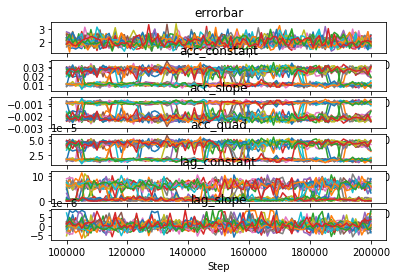

In [6]:
#all parameters per iter
ensemble=newmcmc.samples[int(initmodel/newmcmc.thin_by-1)::stepEnsemble,:,:]
print(ensemble.shape)

xaxis=np.arange(initmodel,newmcmc.totalSteps+1,stepEnsemble*newmcmc.thin_by)
print(xaxis)
nmodels=len(xaxis)
print(nmodels)

for i in np.arange(1,numparams+1):
    plt.subplot(numparams,1,i)
    plt.plot(xaxis,ensemble[:,:,i-1])
    plt.title(paramsList[i-1])
plt.xlabel('Step')

#create folder for saving figure
if not os.path.exists(newmcmc.directory+'figures/'+'paramsIter/'):
    os.makedirs(newmcmc.directory+'figures/'+'paramsIter/')
    
plt.savefig(newmcmc.directory+'figures/'+'paramsIter/'
            +newmcmc.modelName+'_'+str(newmcmc.maxSteps)+'.pdf',
            facecolor='w',pad_inches=0.1)

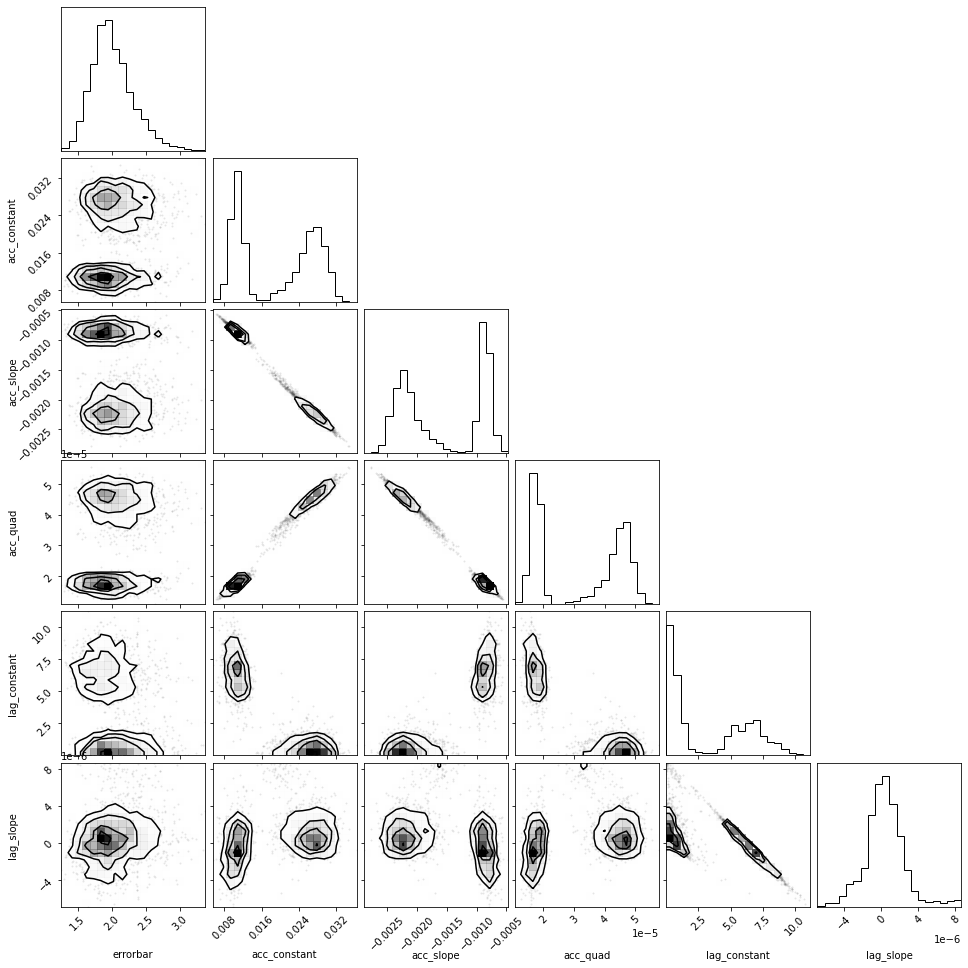

In [7]:
#corner plot with parameter distributions

#reshape ensemble
ensemble2d=ensemble.reshape((newmcmc.nwalkers*nmodels,numparams))
#plot
fig=corner.corner(ensemble2d,labels=paramsList)

#create folder for saving figure
if not os.path.exists(newmcmc.directory+'figures/'+'corner/'):
    os.makedirs(newmcmc.directory+'figures/'+'corner/')
    
plt.savefig(newmcmc.directory+'figures/'+'corner/'
            +newmcmc.modelName+'_'+str(newmcmc.maxSteps)+'.pdf',
            facecolor='w',pad_inches=0.1)

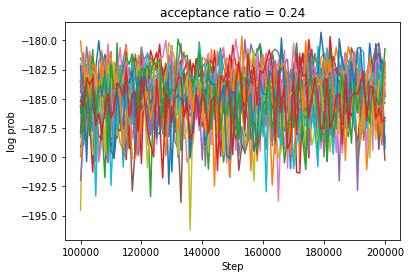

In [8]:
#log prob
logprob=newmcmc.logprob[int(initmodel/newmcmc.thin_by-1)::stepEnsemble,:]

plt.figure()
plt.plot(xaxis,logprob)
plt.title(label='acceptance ratio = '+ str(np.round(np.mean(newmcmc.accFraction),2)))
plt.xlabel('Step')
plt.ylabel('log prob')


#create folder for saving figure
if not os.path.exists(newmcmc.directory+'figures/'+'logprob/'):
    os.makedirs(newmcmc.directory+'figures/'+'logprob/')
    
plt.savefig(newmcmc.directory+'figures/'+'logprob/'
            +newmcmc.modelName+'_'+str(newmcmc.maxSteps)+'.pdf',
            facecolor='w',pad_inches=0.1)

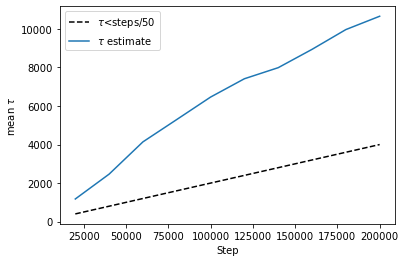

In [9]:
#autocorrelation values
autoxaxis=(newmcmc.maxSteps/10)*np.arange(1,11)
autoxaxis=autoxaxis[:len(newmcmc.autocorr)]

plt.plot(autoxaxis,autoxaxis/50,"--k",label=r'$\tau$<steps/50 ')
plt.plot(autoxaxis[np.nonzero(newmcmc.autocorr)],newmcmc.autocorr[np.nonzero(newmcmc.autocorr)],label=r'$\tau$ estimate')
plt.xlabel('Step')
plt.ylabel(r'mean $\tau$')
ax=plt.gca()
ax.legend()

#create folder for saving figure
if not os.path.exists(newmcmc.directory+'figures/'+'autocorr/'):
    os.makedirs(newmcmc.directory+'figures/'+'autocorr/')
    
plt.savefig(newmcmc.directory+'figures/'+'autocorr/'
            +newmcmc.modelName+'_'+str(newmcmc.maxSteps)+'.pdf',
            facecolor='w',pad_inches=0.1)

In [11]:
#lag, acc rate and y per time for each model 
#indxlagparams=paramsList.index(lagparamsList[0])

lagt=np.zeros((nmodels*newmcmc.nwalkers,len(newmcmc.tr.accuModel._times)))
acct=np.zeros((nmodels*newmcmc.nwalkers,len(newmcmc.tr.accuModel._times)))
tmpt=np.zeros((nmodels*newmcmc.nwalkers,len(newmcmc.tr.accuModel._times),2))

indxw=0
for w in range(0,newmcmc.nwalkers):
    for i in range(0,nmodels):
            iparams=dict(zip(newmcmc.tr.all_parameter_names,ensemble[i,w,:]))
            newmcmc.tr.set_model(iparams)

            lagti=newmcmc.tr.lagModel.get_lag_at_t(newmcmc.tr.accuModel._times)
            accti=newmcmc.tr.accuModel.get_accumulation_at_t(newmcmc.tr.accuModel._times)
            tmpti=np.array(newmcmc.tr.get_trajectory(newmcmc.tr.accuModel._times))
            
            lagt[indxw]=lagti
            acct[indxw]=accti
            tmpt[indxw,:,:]=tmpti.T
            indxw=indxw+1

            


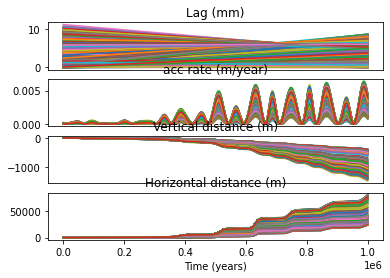

In [14]:

plt.figure()
#plot lagt
plt.subplot(4,1,1)
plt.plot(newmcmc.tr.accuModel._times,lagt.T)
plt.xticks([], [])
plt.title('Lag (mm)')

#plot lagt
plt.subplot(4,1,2)
plt.plot(newmcmc.tr.accuModel._times,acct.T)
plt.xticks([], [])
plt.title('acc rate (m/year)')

#plot yt
plt.subplot(4,1,3)
plt.plot(newmcmc.tr.accuModel._times,tmpt[:,:,1].T)
plt.title('Vertical distance (m)')
plt.xticks([], [])

#plot xt
plt.subplot(4,1,4)
plt.plot(newmcmc.tr.accuModel._times,tmpt[:,:,0].T)
plt.xlabel('Time (years)')
plt.title('Horizontal distance (m)')

#create folder for saving figure
if not os.path.exists(newmcmc.directory+'figures/'+'lagaccdist/'):
    os.makedirs(newmcmc.directory+'figures/'+'lagaccdist/')
    
plt.savefig(newmcmc.directory+'figures/'+'lagaccdist/'
            +newmcmc.modelName+'_'+str(newmcmc.maxSteps)+'.pdf',
            facecolor='w',pad_inches=0.1)

1916


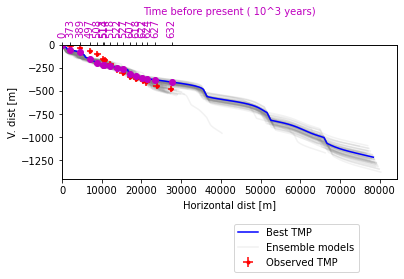

In [16]:
# tmp for opt params, params with highest log prob and 100 random models in ensemble
#reshape logprob
logprob1d=logprob.reshape(nmodels*newmcmc.nwalkers,1)
#best model params
bestTMPindx=np.argmax(logprob1d)

print(bestTMPindx)

bestTMP=tmpt[bestTMPindx,:,:]
plt.plot(bestTMP[:,0],bestTMP[:,1],c='b',label='Best TMP')

#get errorbar of best tmp
errorbar1d=ensemble[:,:,0].reshape(nmodels*newmcmc.nwalkers,1)
bestErrorbar=errorbar1d[bestTMPindx]

ratioyx=0.4;

#find nearest points
ndata=len(newmcmc.xdata)
x_model=bestTMP[:,0]
y_model=bestTMP[:,1]
xnear = np.zeros_like(newmcmc.xdata)
ynear = np.zeros_like(newmcmc.ydata)
timenear = np.zeros_like(newmcmc.xdata)

for i, (xdi, ydi) in enumerate(zip(newmcmc.xdata, newmcmc.ydata)):
    dist = newmcmc.tr._L2_distance(x_model, xdi, y_model, ydi)
    ind = np.argmin(dist)
    xnear[i] = x_model[ind]
    ynear[i] = y_model[ind]
    timenear[i] = newmcmc.tr.accuModel._times[ind]
    
#plot tmp data assuming errorbar is last errorbar of mcmc
xerr, yerr = bestErrorbar*newmcmc.tr.meters_per_pixel
plt.errorbar(x=newmcmc.xdata, xerr=xerr, y=newmcmc.ydata, yerr=yerr, 
             c='r', marker='.', ls='',label='Observed TMP')

for i in range(nmodels):
    indx=np.random.randint(0,nmodels*newmcmc.nwalkers)
    plt.plot(tmpt[indx,:,0],tmpt[indx,:,1],c="gray", alpha=0.1, zorder=-1)
plt.plot(tmpt[indx,:,0],tmpt[indx,:,1],c="gray", alpha=0.1, zorder=-1,label='Ensemble models')
plt.xlabel("Horizontal dist [m]")
plt.ylabel("V. dist [m]")
ax=plt.gca()
ax.legend(bbox_to_anchor=(0.5, -0.3), loc='upper left')
ymin,ymax=ax.get_ylim()
xmin,xmax=ax.get_xlim()
ax.set_ylim(ymin,0)
ax.set_xlim(0,xmax)
ax.set_box_aspect(ratioyx)

#plot times on right axis
ax2=ax.twiny()
color='m'
ax2.set_xlabel('Time before present ( 10^3 years)',color=color)
plt.scatter(xnear,ynear,marker="o",color='m')
ax2.set_ylim(ymin,0)
ax2.set_xlim(0,xmax)
ax2.tick_params(axis='x',labelcolor=color)
plt.xticks(xnear,np.round(timenear/1000).astype(int),rotation=90)
ax2.set_box_aspect(ratioyx)

#create folder for saving figure
if not os.path.exists(newmcmc.directory+'figures/'+'tmp/'):
    os.makedirs(newmcmc.directory+'figures/'+'tmp/')
    
plt.savefig(newmcmc.directory+'figures/'+'tmp/'
            +newmcmc.modelName+'_'+str(newmcmc.maxSteps)+'.pdf',
            facecolor='w',pad_inches=0.1)
